In [1]:
import yfinance as yf

In [2]:
reliance_data = yf.download('Reliance.ns', start = '2020-10-01', end='2024-04-10')

[*********************100%%**********************]  1 of 1 completed


In [3]:
reliance_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,2089.486572,2089.486572,2043.521240,2053.905029,2032.931885,10391613
2020-10-05,2071.211182,2075.964600,2036.137329,2041.859863,2021.009888,9461399
2020-10-06,2053.905029,2061.888916,2032.122192,2040.152344,2019.319702,9206087
2020-10-07,2062.904297,2131.206299,2049.059326,2083.671875,2062.394775,26585432
2020-10-08,2085.056152,2093.363281,2050.997559,2066.826904,2045.721680,10538904


In [4]:
reliance_data['next_close'] = reliance_data['Close'].shift(-1)

reliance_data['close_diff'] = reliance_data['next_close'] - reliance_data['Close']

reliance_data['price_movement'] ='up'

reliance_data.loc[reliance_data['close_diff']>0,'price_movement'] = 'up'
reliance_data.loc[reliance_data['close_diff']<0,'price_movement'] ='down'




In [11]:
reliance_data.head()

,Open,High,Low,Close,Adj Close,Volume,next_close,close_diff,price_movement
Date,,,,,,,,,
2020-10-01,2089.486572,2089.486572,2043.521240,2053.905029,2032.931885,10391613,2041.859863,-12.045166,0
2020-10-05,2071.211182,2075.964600,2036.137329,2041.859863,2021.009888,9461399,2040.152344,-1.707520,0
2020-10-06,2053.905029,2061.888916,2032.122192,2040.152344,2019.319702,9206087,2083.671875,43.519531,1
2020-10-07,2062.904297,2131.206299,2049.059326,2083.671875,2062.394775,26585432,2066.826904,-16.844971,0
2020-10-08,2085.056152,2093.363281,2050.997559,2066.826904,2045.721680,10538904,2061.473633,-5.353271,0


In [6]:
reliance_data['price_movement'].unique()

array(['down', 'up'], dtype=object)

In [7]:
reliance_data['price_movement'].value_counts()

price_movement
up      456
down    415
Name: count, dtype: int64

In [10]:
price_mapping ={'up':1,'down':0}

reliance_data['price_movement'] = reliance_data['price_movement'].map(price_mapping)

In [12]:
x = reliance_data.drop(columns= ['next_close','close_diff','price_movement'])
y = reliance_data['price_movement']

In [13]:
x.shape

(871, 6)

In [14]:
y.shape

(871,)

In [15]:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train = x.iloc[:650]
y_train = y.iloc[:650]
x_test = x.iloc[650:]
y_test =y.iloc[650:]


lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)



LogisticRegression()

In [16]:
y_preds = lr_clf.predict(x_test)

In [28]:
y_pred_proba = lr_clf.predict_proba(x_test)

In [29]:
y_pred_proba

array([[0.50117119, 0.49882881],
       [0.52192462, 0.47807538],
       [0.48365004, 0.51634996],
       [0.49301019, 0.50698981],
       [0.48136726, 0.51863274],
       [0.51469657, 0.48530343],
       [0.5053553 , 0.4946447 ],
       [0.50563657, 0.49436343],
       [0.47213005, 0.52786995],
       [0.48625862, 0.51374138],
       [0.49626904, 0.50373096],
       [0.47987907, 0.52012093],
       [0.49852731, 0.50147269],
       [0.5287916 , 0.4712084 ],
       [0.52063033, 0.47936967],
       [0.49188645, 0.50811355],
       [0.51664964, 0.48335036],
       [0.5116637 , 0.4883363 ],
       [0.50700883, 0.49299117],
       [0.49253893, 0.50746107],
       [0.50818064, 0.49181936],
       [0.46120743, 0.53879257],
       [0.53476529, 0.46523471],
       [0.51306553, 0.48693447],
       [0.50625759, 0.49374241],
       [0.48496036, 0.51503964],
       [0.50106525, 0.49893475],
       [0.49383238, 0.50616762],
       [0.49095276, 0.50904724],
       [0.51143423, 0.48856577],
       [0.

In [17]:
y_preds

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(accuracy_score(y_preds,y_test))
print(precision_score(y_preds,y_test))
print(recall_score(y_preds,y_test))
print(f1_score(y_preds,y_test))
con_matrix = confusion_matrix(y_preds,y_test)

0.4253393665158371
0.23529411764705882
0.4375
0.30601092896174864


<Axes: >

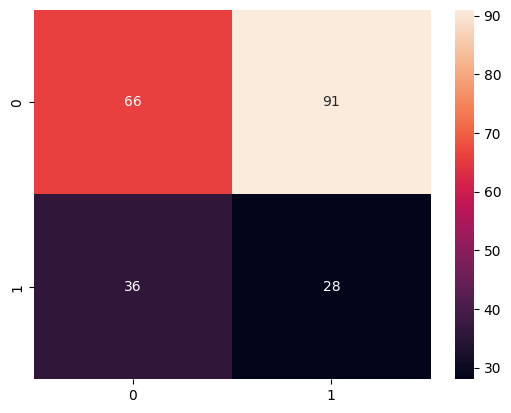

In [26]:
#precsion= tp/tp+fp
#recall = tp/tp+fn


import seaborn as sns

sns.heatmap(con_matrix, annot=True)
